<a href="https://colab.research.google.com/github/KyleSprague/DCS_210/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("fivethirtyeight") #installing package with Bechnel test data set

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("tidyverse") #installing package with R functions

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(fivethirtyeight) 
library(tidyverse)

Some larger datasets need to be installed separately, like senators and
house_district_forecast. To install these, we recommend you install the
fivethirtyeightdata package by running:
install.packages('fivethirtyeightdata', repos =
'https://fivethirtyeightdata.github.io/drat/', type = 'source')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
?fivethirtyeight

#this function tells us that information about the data set can
#be found using ?bechdel 


In [5]:
?bechdel 
head(bechdel)

year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013,domgross_2013,intgross_2013,period_code,decade_code
<int>,<chr>,<chr>,<chr>,<ord>,<chr>,<int>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>
2013,tt1711425,21 & Over,notalk,notalk,FAIL,13000000,25682380,42195766,2013FAIL,13000000,25682380,42195766,1,1
2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714,40868994,2012PASS,45658735,13611086,41467257,1,1
2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035,158607035,2013FAIL,20000000,53107035,158607035,1,1
2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460,132493015,2013FAIL,61000000,75612460,132493015,1,1
2013,tt0453562,42,men,men,FAIL,40000000,95020213,95020213,2013FAIL,40000000,95020213,95020213,1,1
2013,tt1335975,47 Ronin,men,men,FAIL,225000000,38362475,145803842,2013FAIL,225000000,38362475,145803842,1,1


##QUESTION 1
Using the ?bechdel command tells us that we have a data frame from the article cited in the project description with 1794 rows and 15 variables (where the variables, of course, represent the columns). To make the variables more easily understandable, we can print the columns with head(bechdel). The variables are the following: 

**Year**: the year the movie was released <br>  
**imdb**: test for imdb link <br> 
**Title**: the title of the movie <br>
**Test**: the results of the Bechnel test with added <br> discrepencies <br>
**Clean Test:** The test results with additional <br> information but absent any discrepencies <br> 
(this can include, ok, dubious, notalk, nowomen, <br>  or men)  
**binary**: The result of the Bechdel test <br> 
**budget**: Film budget not adjusted for inflation <br> 
**domgross**: Domestic US gross: US gross not <br>adjusted for inflation <br>
**intgross**: International gross not adjusted for <br> inflation <br>
**budget_2013**: budget with 2013 inflated price <br>
**domgross_2013**: domestic gross with 2013 inflated <br> price <br> 
**intgross_2013**: international gross adjusted for <br> 2013 inflation 
**period_code**: no further info given but presumably one time period 
**decade_code**: no further info but presumably one of the four decades under investigation. 

 





In [6]:
bechdel90_13 <- bechdel%>% 
  filter(between(year, 1990, 2013)) 

print(bechdel90_13) 
row_number = nrow(bechdel90_13) 
print(row_number)

# A tibble: 1,615 × 15
    year imdb    title test  clean…¹ binary budget domgr…² intgr…³ code  budge…⁴
   <int> <chr>   <chr> <chr> <ord>   <chr>   <int>   <dbl>   <dbl> <chr>   <int>
 1  2013 tt1711… 21 &… nota… notalk  FAIL   1.3 e7  2.57e7  4.22e7 2013…  1.3 e7
 2  2012 tt1343… Dred… ok-d… ok      PASS   4.5 e7  1.34e7  4.09e7 2012…  4.57e7
 3  2013 tt2024… 12 Y… nota… notalk  FAIL   2   e7  5.31e7  1.59e8 2013…  2   e7
 4  2013 tt1272… 2 Gu… nota… notalk  FAIL   6.1 e7  7.56e7  1.32e8 2013…  6.1 e7
 5  2013 tt0453… 42    men   men     FAIL   4   e7  9.50e7  9.50e7 2013…  4   e7
 6  2013 tt1335… 47 R… men   men     FAIL   2.25e8  3.84e7  1.46e8 2013…  2.25e8
 7  2013 tt1606… A Go… nota… notalk  FAIL   9.2 e7  6.73e7  3.04e8 2013…  9.2 e7
 8  2013 tt2194… Abou… ok-d… ok      PASS   1.2 e7  1.53e7  8.73e7 2013…  1.2 e7
 9  2013 tt1814… Admi… ok    ok      PASS   1.3 e7  1.80e7  1.80e7 2013…  1.3 e7
10  2013 tt1815… Afte… nota… notalk  FAIL   1.3 e8  6.05e7  2.44e8 2013…  1.3 e8
# … w

##QUESTION 2 

Since each row corresponds to a movie, and there are 1615 rows, we know that there are 1615 movies in the filtered data set spanning from 1990 to 2013. 

In [7]:
bechdel90_13 %>% #now we are entering into the Bechdel data set
  group_by(binary) %>% 
  summarise(med_budget = median(budget_2013), 
    med_domgross = median(domgross_2013, na.rm = TRUE),
    med_intgross = median(intgross_2013, na.rm = TRUE)) 

#prints out the gross domestic, gross international, and budget 
#for movies that fail the bechdel test and pass it 

binary,med_budget,med_domgross,med_intgross
<chr>,<dbl>,<dbl>,<dbl>
FAIL,48385984,57318606,104475669
PASS,31070724,45330446,80124349


In [8]:
bechdel90_13%>% 
  group_by(clean_test)%>% #we are working with the more
  #detailed clean test data rather than the binary test 
  summarise(med_budget = median(budget_2013), 
    med_domgross = median(domgross_2013, na.rm = TRUE), 
    med_intgross = median(intgross_2013, na.rm = TRUE))


clean_test,med_budget,med_domgross,med_intgross
<ord>,<dbl>,<dbl>,<dbl>
nowomen,43373066,44891296,89509349
notalk,56570084,63890455,123102194
men,39737690,56392786,99578022
dubious,35790994,49173429,89883201
ok,31070724,45330446,80124349


In [9]:
#now we want to look on the return on investment for movies that
#pass/fail the Bechdel test

bechdel90_13 <- bechdel90_13 %>% #what is the point of this line? 
  mutate(roi = (intgross_2013 + domgross_2013)/budget_2013) 
  #mutate function adds new variable to dataframe( in this case, roi) 
  #while retaining existing variable information 

bechdel90_13 %>% 
  arrange(desc(roi)) %>%  
  select(title, roi, year) 

#here we grab arrange the movies in order of descending roi, with roi 
#for each row predetermined by the code above; then we select rows 
#title, roi, and year

title,roi,year
<chr>,<dbl>,<int>
Paranormal Activity,671.33686,2007
The Blair Witch Project,648.06533,1999
El Mariachi,583.28567,1992
Clerks.,258.06146,1994
In the Company of Men,230.69259,1997
Napoleon Dynamite,226.65924,2004
Once,189.62070,2006
The Devil Inside,155.02037,2012
Primer,141.52085,2004


Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”


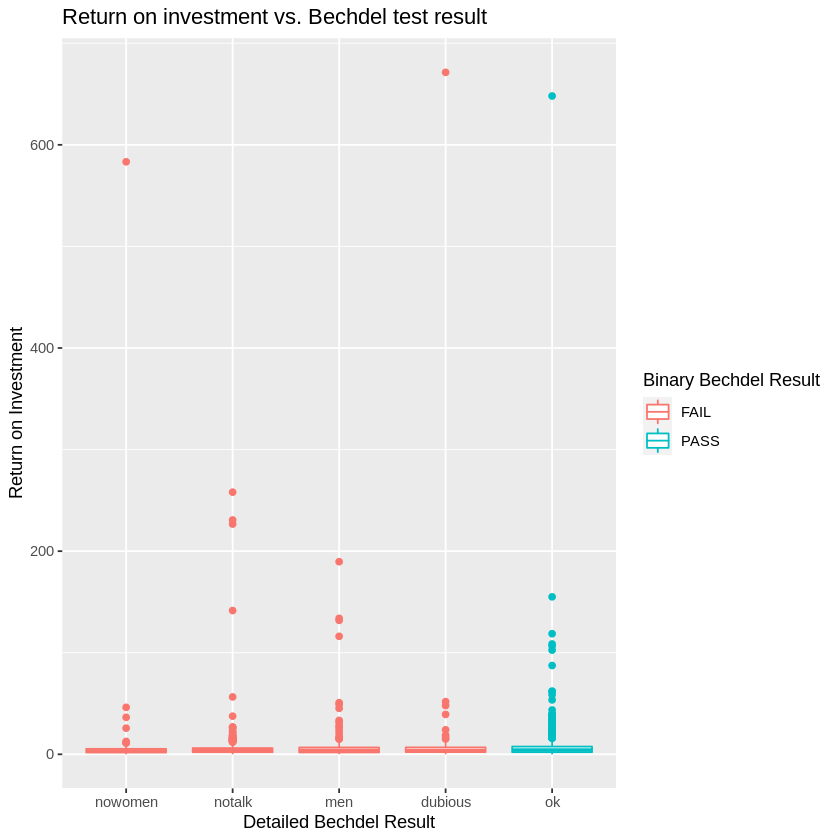

In [10]:
#plotting: 

#first line, data; second line, actual columns and info; 
#third line: plot type; fourth line: creating title info 
ggplot(data = bechdel90_13, 
    mapping = aes(x = clean_test, y = roi, color = binary)) + 
  geom_boxplot() + 
  labs(title = "Return on investment vs. Bechdel test result", 
    x = "Detailed Bechdel Result", 
    y = "Return on Investment", 
    color = "Binary Bechdel Result")

In [11]:
bechdel90_13 %>% 
  filter(roi>400) %>% 
  select(title)

title
<chr>
Paranormal Activity
The Blair Witch Project
El Mariachi


##QUESTION 3: 

As we can see, the movies that have ROI values of over 400 (that is, the extreme values with alter our perception of our Bechdel and Return on Investment plot), are "Paranormal Activity", "The Blair Witch Project", and "El Mariachi". 

Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”


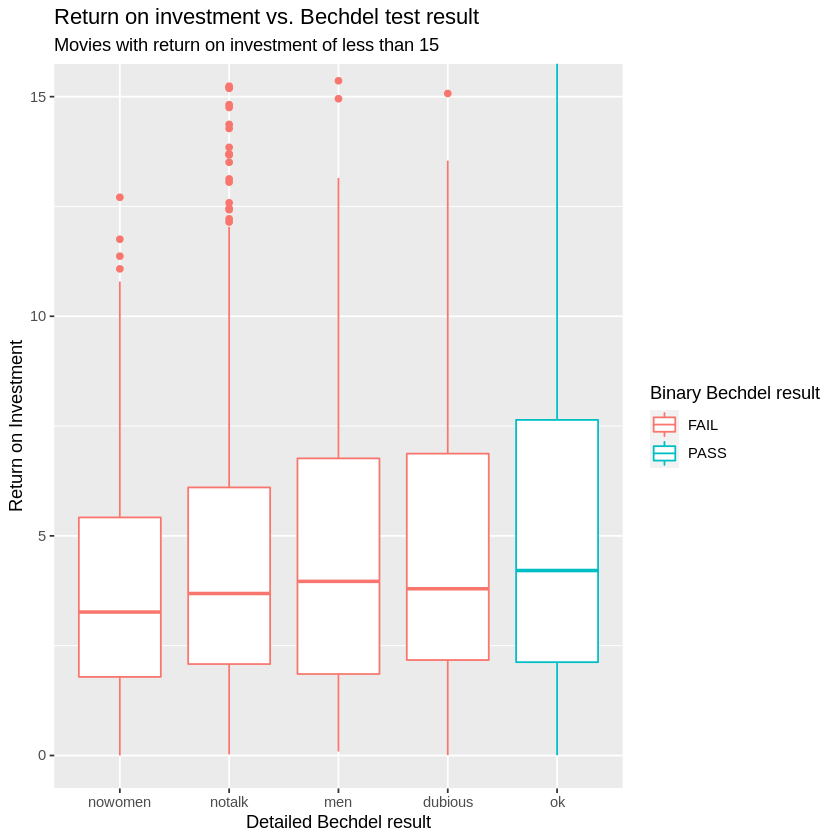

In [14]:
#Zooming in on moview with an ROI of less than 400

ggplot(data = bechdel90_13, mapping = aes(x =clean_test, y = roi, color = 
binary))+ 
  geom_boxplot() + 
  labs(title = "Return on investment vs. Bechdel test result", 
    subtitle = "Movies with return on investment of less than 15", 
    x = "Detailed Bechdel result", 
    y = "Return on Investment", 
      color = "Binary Bechdel result") + 
  coord_cartesian(ylim = c(0,15)) #just zooming in on the plot